In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


dfVariant = pd.read_csv('covid-variants.csv')
dfVariant = dfVariant[dfVariant['variant'] == 'Delta']
print(dfVariant)

       location        date variant  num_sequences  perc_sequences  \
9        Angola  2020-12-21   Delta            0.0             0.0   
32       Angola  2021-01-25   Delta            0.0             0.0   
55       Angola  2021-02-08   Delta            0.0             0.0   
78       Angola  2021-02-22   Delta            0.0             0.0   
101      Angola  2021-03-08   Delta            0.0             0.0   
...         ...         ...     ...            ...             ...   
45756  Zimbabwe  2021-01-11   Delta            0.0             0.0   
45779  Zimbabwe  2021-01-25   Delta            0.0             0.0   
45802  Zimbabwe  2021-02-08   Delta            0.0             0.0   
45825  Zimbabwe  2021-07-12   Delta           42.0           100.0   
45848  Zimbabwe  2021-07-26   Delta           35.0           100.0   

       num_sequences_total  
9                       93  
32                      52  
55                      42  
78                      39  
101           

In [67]:
dfVariant['date']= pd.to_datetime(dfVariant['date'])
dfVariant=dfVariant[(dfVariant['date']>'2021-1-1')&(dfVariant['date']<'2021-10-16')]
dfVariant.set_index(dfVariant['date'], inplace=True)
print(dfVariant)

            location       date variant  num_sequences  perc_sequences  \
date                                                                     
2021-01-25    Angola 2021-01-25   Delta            0.0             0.0   
2021-02-08    Angola 2021-02-08   Delta            0.0             0.0   
2021-02-22    Angola 2021-02-22   Delta            0.0             0.0   
2021-03-08    Angola 2021-03-08   Delta            0.0             0.0   
2021-03-22    Angola 2021-03-22   Delta            0.0             0.0   
...              ...        ...     ...            ...             ...   
2021-01-11  Zimbabwe 2021-01-11   Delta            0.0             0.0   
2021-01-25  Zimbabwe 2021-01-25   Delta            0.0             0.0   
2021-02-08  Zimbabwe 2021-02-08   Delta            0.0             0.0   
2021-07-12  Zimbabwe 2021-07-12   Delta           42.0           100.0   
2021-07-26  Zimbabwe 2021-07-26   Delta           35.0           100.0   

            num_sequences_total  
dat

In [68]:
dfDeltaUK = dfVariant[(dfVariant["location"]=="United Kingdom")]
dfDeltaUS = dfVariant[(dfVariant["location"]=="United States")]
dfDeltaJP = dfVariant[(dfVariant["location"]=="Japan")]
dfDeltaAU = dfVariant[(dfVariant["location"]=="Australia")]
dfDeltaBR = dfVariant[(dfVariant["location"]=="Brazil")]


# dfDeltaUK = dfVariant[(dfVariant["location"]=="United Kingdom")&(dfVariant["perc_sequences"] > 50.00)]
# dfDeltaUS = dfVariant[(dfVariant["location"]=="United States")&(dfVariant["perc_sequences"] > 50.00)]
# dfDeltaJP = dfVariant[(dfVariant["location"]=="Japan")&(dfVariant["perc_sequences"] > 50.00)]
# dfDeltaAU = dfVariant[(dfVariant["location"]=="Australia")&(dfVariant["perc_sequences"] > 50.00)]
# dfDeltaBR = dfVariant[(dfVariant["location"]=="Brazil")&(dfVariant["perc_sequences"] > 50.00)]

In [69]:
# print(dfDeltaUK.shape, dfDeltaUK)
# print(dfDeltaUS.shape, dfDeltaUS)
# print(dfDeltaJP)
# print(dfDeltaAU)
# print(dfDeltaBR)

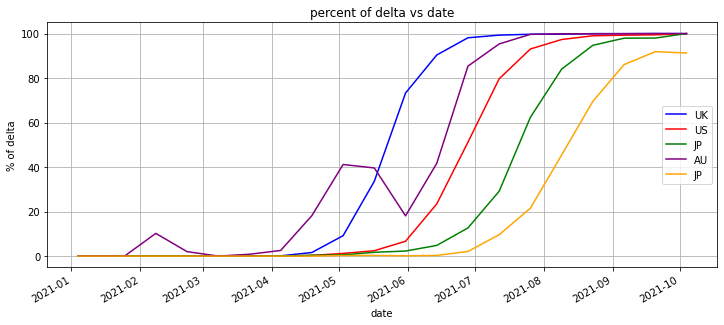

In [70]:
plt.figure(figsize=(12,5))
plt.title('percent of delta vs date')
plt.ylabel('% of delta')
ax1 = dfDeltaUK.perc_sequences.plot(color='blue', grid=True, label='UK')
ax2 = dfDeltaUS.perc_sequences.plot(color='red', grid=True,  label='US')
ax3 = dfDeltaJP.perc_sequences.plot(color='green', grid=True,  label='JP')
ax4 = dfDeltaAU.perc_sequences.plot(color='purple', grid=True,  label='AU')
ax5 = dfDeltaBR.perc_sequences.plot(color='orange', grid=True,  label='JP')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h2, l2 = ax3.get_legend_handles_labels()
h2, l2 = ax4.get_legend_handles_labels()
h2, l2 = ax5.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
ax3.legend(loc=3)
ax4.legend(loc=4)
ax5.legend(loc=5)
plt.show()


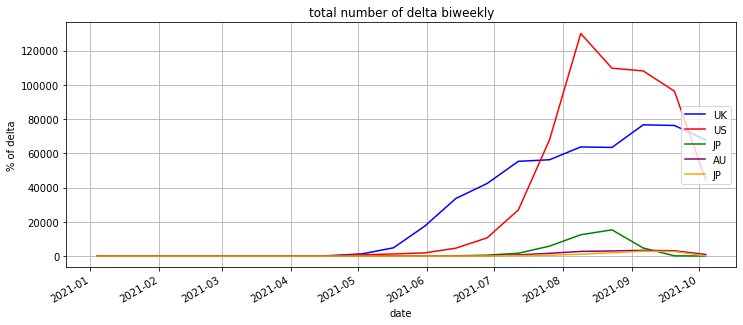

In [71]:
plt.figure(figsize=(12,5))
plt.title('total number of delta biweekly')
plt.ylabel('% of delta')
ax1 = dfDeltaUK.num_sequences.plot(color='blue', grid=True, label='UK')
ax2 = dfDeltaUS.num_sequences.plot(color='red', grid=True,  label='US')
ax3 = dfDeltaJP.num_sequences.plot(color='green', grid=True,  label='JP')
ax4 = dfDeltaAU.num_sequences.plot(color='purple', grid=True,  label='AU')
ax5 = dfDeltaBR.num_sequences.plot(color='orange', grid=True,  label='JP')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h2, l2 = ax3.get_legend_handles_labels()
h2, l2 = ax4.get_legend_handles_labels()
h2, l2 = ax5.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
ax3.legend(loc=3)
ax4.legend(loc=4)
ax5.legend(loc=5)
plt.show()


In [72]:
# df = dfVariant.resample('m').mean()
# print(df)

In [73]:
# change to weekly not working
dfUK = dfVariant[(dfVariant["location"]=="United Kingdom")].resample('sm').mean()
dfUS = dfVariant[(dfVariant["location"]=="United States")].resample('sm').mean()
dfJP = dfVariant[(dfVariant["location"]=="Japan")].resample('sm').mean()
dfAU = dfVariant[(dfVariant["location"]=="Australia")].resample('sm').mean()
dfBR = dfVariant[(dfVariant["location"]=="Brazil")].resample('sm').mean()

print(dfAU.shape, dfAU)

(19, 3)             num_sequences  perc_sequences  num_sequences_total
date                                                          
2020-12-31            0.0            0.00                130.0
2021-01-15            0.0            0.00                 93.0
2021-01-31            5.0           10.20                 49.0
2021-02-15            1.0            2.00                 50.0
2021-02-28            0.0            0.00                 70.0
2021-03-15            1.0            0.82                122.0
2021-03-31            3.0            2.52                119.0
2021-04-15           26.0           18.18                143.0
2021-04-30           79.0           41.15                192.0
2021-05-15           40.0           39.60                101.0
2021-05-31           32.5           29.87                101.5
2021-06-15          204.0           85.36                239.0
2021-06-30          714.0           95.33                749.0
2021-07-15         1612.0           99.63      

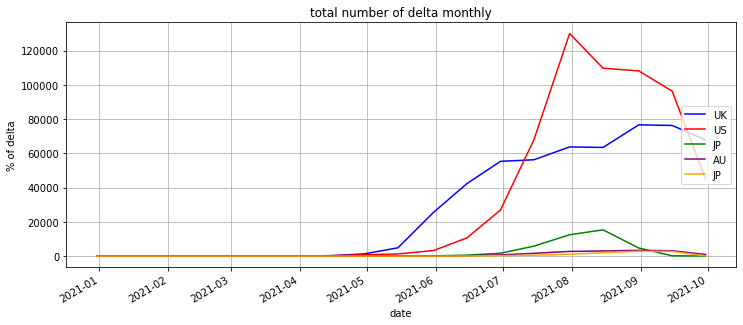

In [74]:
plt.figure(figsize=(12,5))
plt.title('total number of delta monthly')
plt.ylabel('% of delta')
ax1 = dfUK.num_sequences.plot(color='blue', grid=True, label='UK')
ax2 = dfUS.num_sequences.plot(color='red', grid=True,  label='US')
ax3 = dfJP.num_sequences.plot(color='green', grid=True,  label='JP')
ax4 = dfAU.num_sequences.plot(color='purple', grid=True,  label='AU')
ax5 = dfBR.num_sequences.plot(color='orange', grid=True,  label='JP')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h2, l2 = ax3.get_legend_handles_labels()
h2, l2 = ax4.get_legend_handles_labels()
h2, l2 = ax5.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
ax3.legend(loc=3)
ax4.legend(loc=4)
ax5.legend(loc=5)
plt.show()